#**CyberSecurity Data Acquisition: Collecting and Processing Log Data**

In [ ]:
import logging
import structlog
import random
import pandas as pd
from datetime import datetime, timedelta

# Configure structlog
structlog.configure(
    processors=[
        structlog.processors.TimeStamper(fmt="%Y-%m-%d %H:%M:%S"),
        structlog.processors.JSONRenderer(),
    ],
    wrapper_class=structlog.stdlib.BoundLogger,
)

# Create a logger
log = structlog.get_logger()

# Configure standard logging to output to a file
logging.basicConfig(filename='network_logs.csv', level=logging.INFO, format='%(message)s')

# Function to generate log data
def generate_log_data(num_entries=1000):
    actions = ['login', 'logout', 'file_access', 'network_access']
    users = [f'user_{i}' for i in range(1, 101)]
    success_values = [True, False]
    start_time = datetime.now()

    log_entries = []
    for _ in range(num_entries):
        log_entry = {
            'timestamp': (start_time + timedelta(seconds=random.randint(0, 10000))).strftime('%Y-%m-%d %H:%M:%S'),
            'user': random.choice(users),
            'src_ip': f'192.168.1.{random.randint(1, 255)}',
            'dst_ip': f'10.0.0.{random.randint(1, 255)}',
            'action': random.choice(actions),
            'success': random.choice(success_values)
        }
        log_entries.append(log_entry)

    log_df = pd.DataFrame(log_entries)
    log_df.to_csv('network_logs.csv', index=False)
    print(f"Generated {num_entries} log entries and saved to 'network_logs.csv'")

# Generate log data
generate_log_data()


Generated 1000 log entries and saved to 'network_logs.csv'


In [ ]:
import pandas as pd

def collect_and_process_logs(log_file='/content/network_logs.csv'):
    # Load log data into a pandas DataFrame
    log_df = pd.read_csv(log_file)

    # Process log data (example: filtering, aggregation)
    filtered_df = log_df[log_df['action'] == 'login']
    aggregated_df = filtered_df.groupby('user').count()

    # Perform further analysis or actions based on the processed data
    print(aggregated_df)
    return log_df

# Collect and process logs
log_df = collect_and_process_logs()


         timestamp  src_ip  dst_ip  action  success
user                                               
user_1           5       5       5       5        5
user_10          4       4       4       4        4
user_12          3       3       3       3        3
user_13          1       1       1       1        1
user_14          2       2       2       2        2
...            ...     ...     ...     ...      ...
user_95          4       4       4       4        4
user_96          4       4       4       4        4
user_97          4       4       4       4        4
user_98          3       3       3       3        3
user_99          3       3       3       3        3

[91 rows x 5 columns]


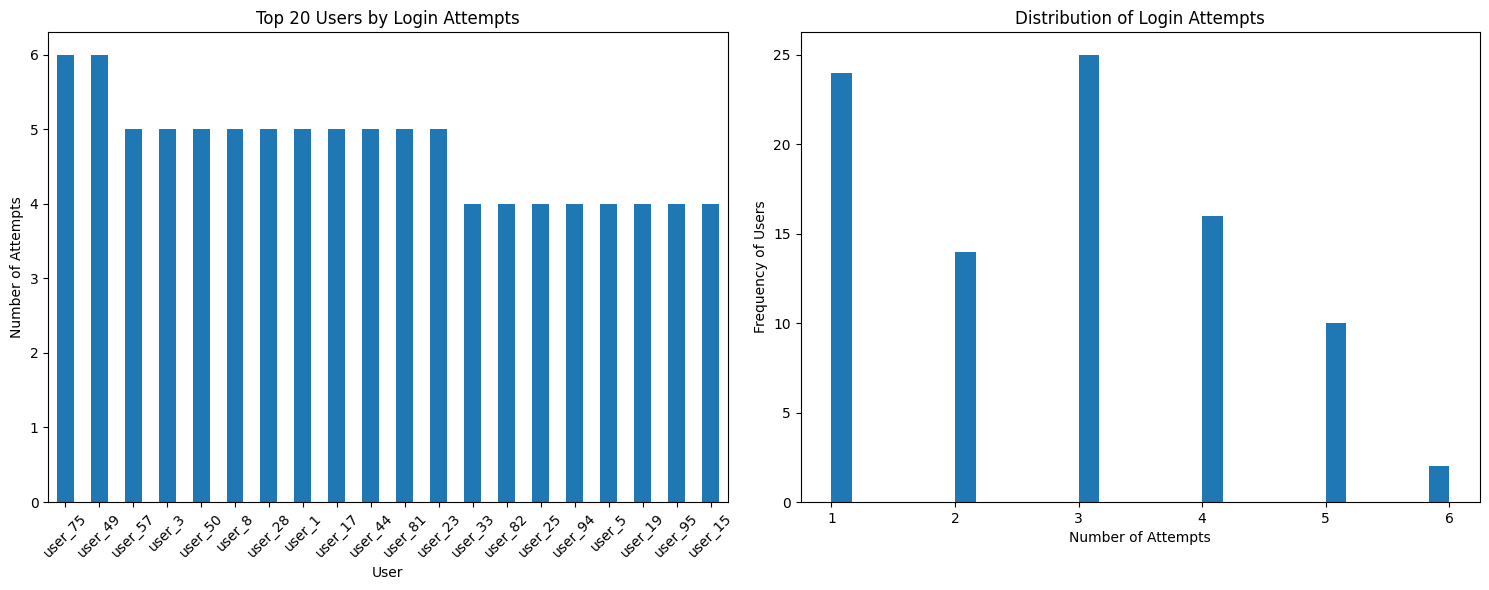

In [ ]:
import matplotlib.pyplot as plt

def visualize_log_data(log_df):
    """Visualizes the log data."""
    # Filter for login attempts
    login_attempts = log_df[log_df['action'] == 'login']

    # Count login attempts by user
    login_counts = login_attempts['user'].value_counts()

    # Display top N users
    top_n = 20  # Adjust N as needed
    top_login_counts = login_counts.head(top_n)

    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Bar chart for top N users
    top_login_counts.plot(kind='bar', ax=axes[0])
    axes[0].set_title(f'Top {top_n} Users by Login Attempts')
    axes[0].set_xlabel('User')
    axes[0].set_ylabel('Number of Attempts')
    axes[0].tick_params(axis='x', rotation=45)

    # Histogram for login attempts distribution
    login_counts.plot(kind='hist', bins=30, ax=axes[1])
    axes[1].set_title('Distribution of Login Attempts')
    axes[1].set_xlabel('Number of Attempts')
    axes[1].set_ylabel('Frequency of Users')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Visualize the log data
visualize_log_data(log_df)


| *System* | *Log Type*  | *Log Name*         | *Location*                                  | *Details*                                              | *How to Access*                               |
|------------|----------------|----------------------|-----------------------------------------------|----------------------------------------------------------|------------------------------------------------|
| Windows    | System         | System Log           | C:\Windows\System32\Winevt\Logs\System.evtx    | Records system events, errors, warnings, and informational messages | Event Viewer: eventvwr.msc                   |
| Windows    | Security       | Security Log         | C:\Windows\System32\Winevt\Logs\Security.evtx  | Records security-related events, including login attempts and resource access | Event Viewer: eventvwr.msc                   |
| Windows    | Application    | Application Log      | C:\Windows\System32\Winevt\Logs\Application.evtx | Records application-specific events                        | Event Viewer: eventvwr.msc                   |
| Windows    | Web Server     | IIS Logs             | C:\inetpub\logs\LogFiles                      | Logs web server access, errors, and other HTTP transactions | Notepad, Log Analyzer tools                     |
| Linux      | System         | Syslog               | /var/log/syslog                               | Logs system-wide messages, including boot and runtime events | cat /var/log/syslog or tail -f /var/log/syslog |
| Linux      | Authentication | Auth.log             | /var/log/auth.log                             | Logs authentication-related events, such as logins and sudo attempts | cat /var/log/auth.log or tail -f /var/log/auth.log |
| Linux      | System         | Kernel Log           | /var/log/kern.log                             | Logs kernel-related messages, including hardware and driver events | cat /var/log/kern.log or tail -f /var/log/kern.log |
| Linux      | Web Server     | Apache Access Log    | /var/log/apache2/access.log                   | Logs HTTP access requests                                 | cat /var/log/apache2/access.log or tail -f /var/log/apache2/access.log |
| Linux      | Web Server     | Apache Error Log     | /var/log/apache2/error.log                    | Logs HTTP server errors                                   | cat /var/log/apache2/error.log or tail -f /var/log/apache2/error.log |
| Linux      | Network        | UFW Log              | /var/log/ufw.log                              | Logs firewall events for Uncomplicated Firewall (UFW)     | cat /var/log/ufw.log or tail -f /var/log/ufw.log |
| Both       | Network        | DHCP Logs            | /var/log/dhcpd.log (Linux) / Windows Event Logs | Logs DHCP lease assignments and requests                  | cat /var/log/dhcpd.log (Linux) / Event Viewer (Windows) |